In [8]:
import numpy as np
import torch

import os

from data.adapter import load_gwhd_df, GwhdToYoloAdapter

print("Checking environment variables...")
assert 'PROJ_PATH' in os.environ
assert 'YOLOV7_ROOT_DIR' in os.environ
assert 'DATASET_MD5' in os.environ
assert 'DATASET_ROOT_DIR' in os.environ
assert 'DATA_BUCKET' in os.environ
print("Environment variables exist.")

DATASET_ROOT_DIR = os.environ['DATASET_ROOT_DIR']

Checking environment variables...
Environment variables exist.


In [9]:
df = load_gwhd_df(os.path.join(DATASET_ROOT_DIR, 'competition_train.csv'))
df

,image_name,BoxesString,domain,image_id,class_id,class_name,Box,x_min,y_min,x_max,y_max,has_annotation
0,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,0,0.0,wheat_head,936 4 977 82,936.0,4.0,977.0,82.0,True
1,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,0,0.0,wheat_head,966 0 1023 114,966.0,0.0,1023.0,114.0,True
2,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,0,0.0,wheat_head,665 9 795 79,665.0,9.0,795.0,79.0,True
3,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,0,0.0,wheat_head,877 0 958 20,877.0,0.0,958.0,20.0,True
4,0007634580386bd39d4d0d24df58893c3bb967e12d6fc0...,936 4 977 82;966 0 1023 114;665 9 795 79;877 0...,Arvalis_11,0,0.0,wheat_head,742 0 852 132,742.0,0.0,852.0,132.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
163625,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,3653,0.0,wheat_head,235 910 283 937,235.0,910.0,283.0,937.0,True
163626,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,3653,0.0,wheat_head,961 530 998 572,961.0,530.0,998.0,572.0,True
163627,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,3653,0.0,wheat_head,980 470 997 522,980.0,470.0,997.0,522.0,True
163628,fff24daa579e1e2752e320f7f8c6b654249a66d1f18cb2...,402 0 491 114;556 35 605 149;500 130 567 186;7...,Arvalis_8,3653,0.0,wheat_head,787 452 851 488,787.0,452.0,851.0,488.0,True


In [10]:
adapter = GwhdToYoloAdapter(os.path.join(DATASET_ROOT_DIR, 'images'), df, None)
image, xyxy_bboxes, class_ids, image_id, image_hw = adapter[0]

In [11]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle


def display_image(image, xyxy_bboxes):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for bbox in xyxy_bboxes:
        height = bbox[3] - bbox[1]
        width = bbox[2] - bbox[0]
        rect = Rectangle((bbox[0], bbox[1]), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

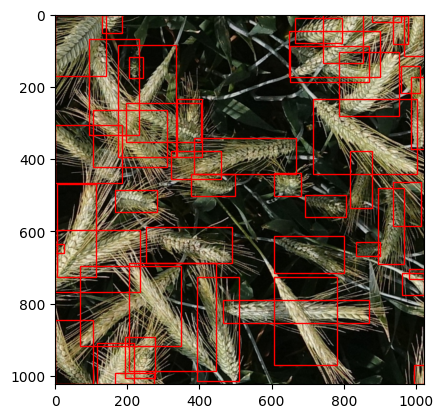

In [12]:

#%matplotlib inline
#bboxes = t._load_target(0, 'bboxes')
#img = t._load_image(0)

# Check if image and targets are loaded correctly
display_image(image, xyxy_bboxes)

AssertionError: 

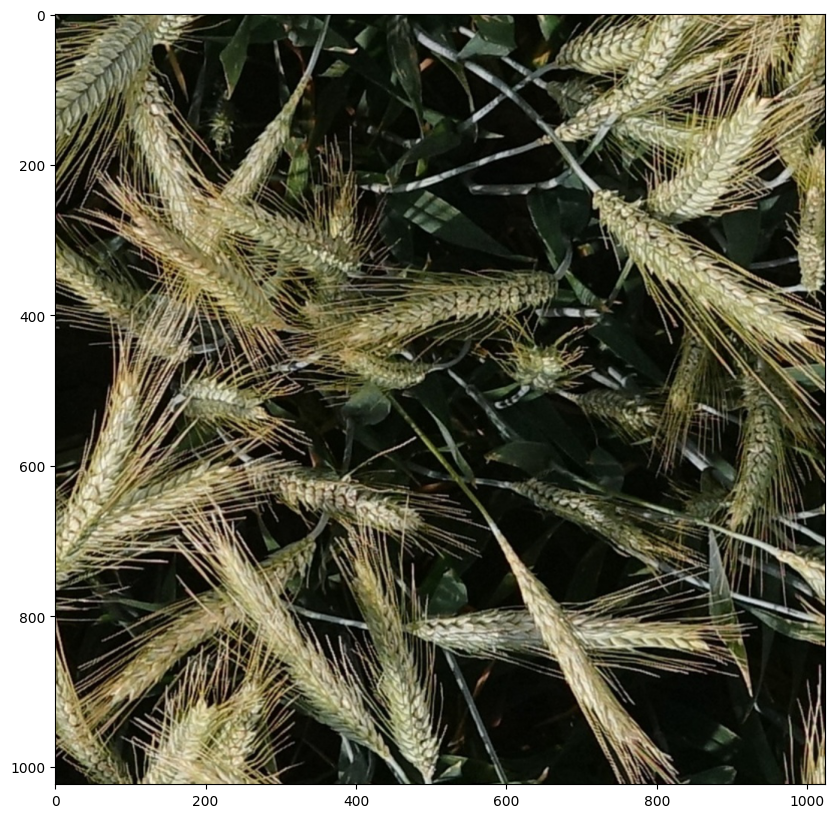

In [16]:
from yolov7.dataset import Yolov7Dataset
from yolov7.plotting import show_image
yolo_ds = Yolov7Dataset(adapter)

image_tensor, labels, image_id, image_size = yolo_ds[0]

# Denormalize boxes
boxes = labels[:, 2:]
boxes[:, [0, 2]] *= image_size[1]
boxes[:, [1, 3]] *= image_size[0]

show_image(image_tensor.permute(1, 2, 0), boxes.tolist(), None, 'cxcywh')